# Walmart Business Case Study - Confidence Interval and CLT

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

- User_ID    :	User ID
- Product_ID :	Product ID
- Gender     :	Sex of User
- Age        :	Age in bins
- Occupation :	Occupation(Masked)
- City_Category         :	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status        :	Marital Status
- ProductCategory       :	Product Category (Masked)
- Purchase              :	Purchase Amount

**Importing required packages**

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan, NAN
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

**Loading data into Dataframe**

In [71]:
walmart_df = pd.read_csv('data/walmart_data.csv')
walmart_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [72]:
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [73]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [74]:
# To convert datatype of cols = ['Gender', 'Age','Product_ID'] to Category
# Changing datatype of Gender, Age and Product_ID from Object to Category.
cols = ['Gender', 'Age','Product_ID','City_Category']
for i in cols:
    walmart_df[i] = walmart_df[i].astype("category")
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int64(5), object(1)
memory usage: 28.0+ MB


In [75]:
walmart_df.isnull().sum()/len(walmart_df) *100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [76]:
walmart_df.duplicated().sum()

0

In [77]:
walmart_df['User_ID'].nunique()

5891

In [78]:
walmart_df.groupby(['Gender'])['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [79]:
round(walmart_df.groupby(['Gender'])['User_ID'].nunique()/walmart_df['User_ID'].nunique() * 100,2)

Gender
F    28.28
M    71.72
Name: User_ID, dtype: float64

# **Outliers detection and removal**

In [80]:
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


**OBS**:
As we can clearly see that, the max value in occupation, Product_Category, Purchase are greated than 75th percentile and way more than mean, so these are the outliers
    

In [81]:
walmart_df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


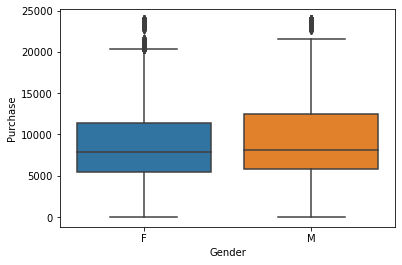

In [82]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = walmart_df)
plt.show()

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

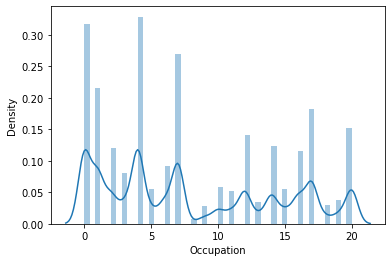

In [83]:
sns.distplot(walmart_df['Occupation'])

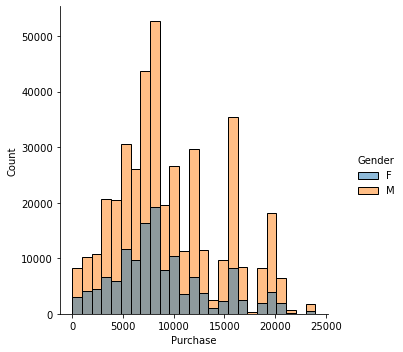

In [84]:
sns.displot(data = walmart_df, x = 'Purchase', hue = 'Gender',bins = 25)
plt.show()

In [155]:
#OBS : We can clearly see that, no. of females puchasing from walmarts are comaparitively low in count than no. of males.

In [86]:
walmart_df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [87]:
walmart_df.sample(300).groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,66.0,8685.666667,5134.780937,1057.0,5286.25,7926.5,11051.0,23657.0
M,234.0,9338.111111,5105.615064,372.0,5904.75,8011.0,11990.5,23475.0


In [88]:
walmart_df_sample1 = walmart_df[walmart_df['Gender'] == 'M']
type(walmart_df_sample1)

pandas.core.frame.DataFrame

In [190]:
walmart_df_sample_purchase = walmart_df_sample1['Purchase']
len(walmart_df_sample_purchase)

414259

In [191]:
walmart_df_sample2 = walmart_df[walmart_df['Gender'] == 'F']
walmart_df_sample_purchase_fem = walmart_df_sample2['Purchase']
len(walmart_df_sample_purchase_fem)

135809

<AxesSubplot:>

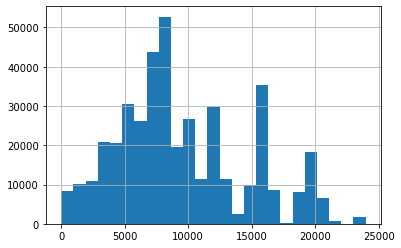

In [90]:
walmart_df_sample_purchase.hist(bins = 25)

As we can see, the above plot is not normal distribution and if we assume it to be normal and do all calculations based on it, it might lead us to wrong conclusion and hence applying CLT to get the sampling distribution of sample means to get a Normal Distribution out of it.

In [91]:
walmart_df_sample_purchase.mean()

9437.526040472265

In [92]:
walmart_df_sample_purchase.std()

5092.186209777949

In [93]:
walmart_df_sample1.shape

(414259, 10)

In [94]:
len(walmart_df_sample_purchase)

414259

So mean lies somewhere in the left side, not symmnetric, it's Right Skewed

**Bootstrapping**

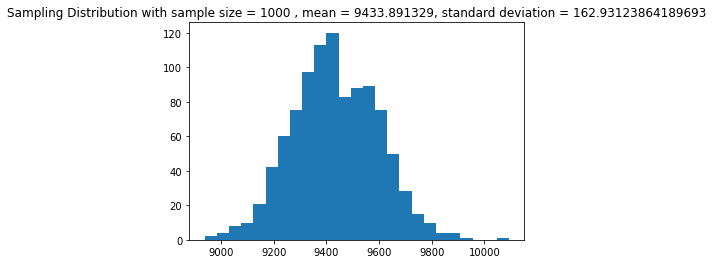

In [159]:

m = 1000
sample = walmart_df_sample_purchase 
size = 1000 
bs_means = np.empty(m)

for i in range(m):
    bs_sample = np.random.choice(sample, size = size)
    bs_means[i] = np.mean(bs_sample)
plt.figure()
plt.hist(bs_means, bins = 25)
plt.title(f"Sampling Distribution with sample size = 1000 , mean = {np.mean(bs_means)}, standard deviation = {np.std(bs_means)}")
plt.show()


In [96]:
# plt.hist(bs_means, bins = 25);

In [100]:
# for comparison
walmart_df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


**Effect of n i.e sample size**

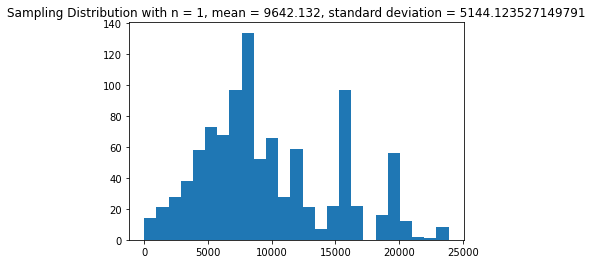

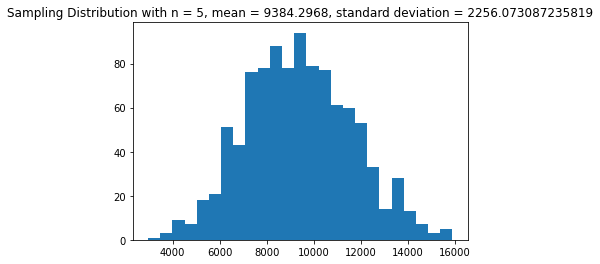

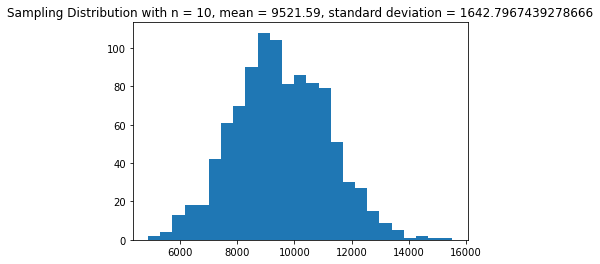

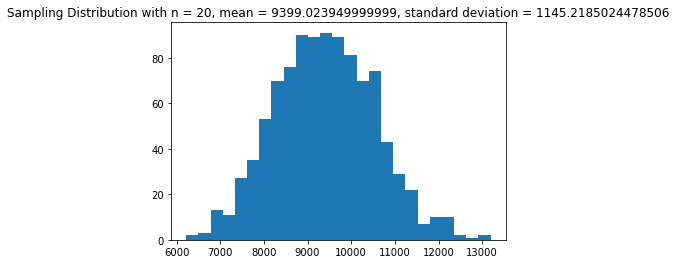

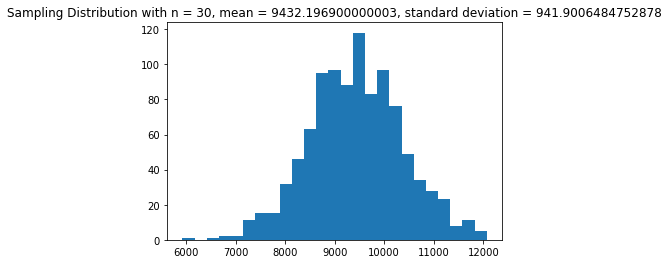

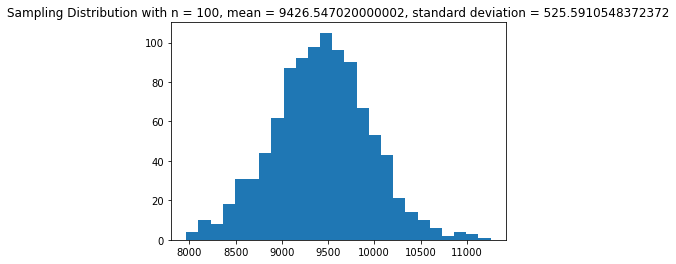

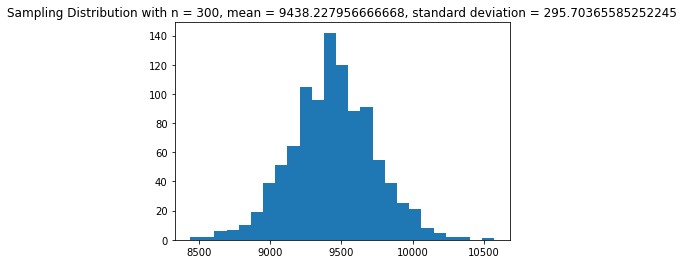

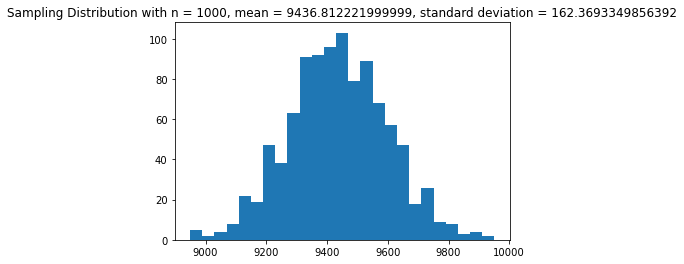

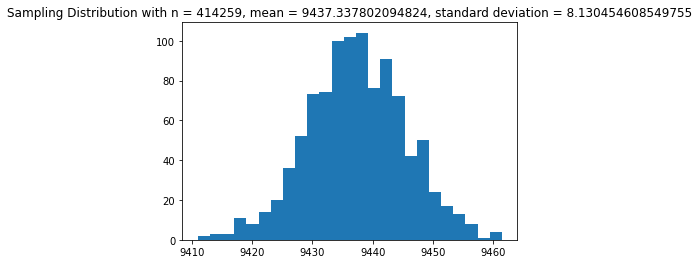

In [158]:
m = 1000 # lenth of "sampling distribution of sample means"
sample = walmart_df_sample_purchase
size_list = [1, 5, 10, 20, 30, 100,300, 1000, len(walmart_df_sample_purchase)]


for n in size_list:
    bs_means_n = np.empty(m)
    for i in range(m):
        bs_sample_n = np.random.choice(sample, size = n)
        bs_means_n[i] = np.mean(bs_sample_n)
    plt.figure()
    plt.hist(bs_means_n, bins = 25)
    plt.title(f"Sampling Distribution with n = {n}, mean = {np.mean(bs_means_n)}, standard deviation = {np.std(bs_means_n)}")
    plt.show()
        

As sample size increase, Standard error (standard deviation of "sampling distribution of sampling means") decreases. And we want the standard error to be minimizes which we have brougt to 8.25 from 5092(org data)

**Standard Error**

In [157]:
m = 1000
sample = walmart_df_sample_purchase
size_list = [1, 5, 10, 20, 30, 100, 300, 1000, len(walmart_df_sample_purchase)]


for n in size_list:
    bs_means_n = np.empty(m)
    for i in range(m):
        bs_sample_n = np.random.choice(sample, size = n)
        bs_means_n[i] = np.mean(bs_sample_n)
    print(f"sample size = {n}, Emperical Standard Error = {np.std(bs_means_n)}, Theoretical Standard Error = {np.std(sample)/np.sqrt(n)}")
    

sample size = 1, Emperical Standard Error = 5058.913845227946, Theoretical Standard Error = 5092.180063635943
sample size = 5, Emperical Standard Error = 2306.9242479609857, Theoretical Standard Error = 2277.292155191835
sample size = 10, Emperical Standard Error = 1674.2756367983857, Theoretical Standard Error = 1610.2887256790739
sample size = 20, Emperical Standard Error = 1130.8143338025025, Theoretical Standard Error = 1138.6460775959174
sample size = 30, Emperical Standard Error = 913.5394580772274, Theoretical Standard Error = 929.7006292438327
sample size = 100, Emperical Standard Error = 506.86201961443027, Theoretical Standard Error = 509.2180063635943
sample size = 300, Emperical Standard Error = 292.80842471007486, Theoretical Standard Error = 293.99715305022573
sample size = 1000, Emperical Standard Error = 154.62308286462408, Theoretical Standard Error = 161.0288725679074
sample size = 414259, Emperical Standard Error = 7.906606804950351, Theoretical Standard Error = 7.91

This will answer to the question, 
- Is our sample size big enough ? 
    - The **sampling distribution should be normally distributed**, if not , increase the sample size.
    - Check **if the standard error is acceptable for our application**, if not increase the sample size.
    - Check **confidence intervals, if the range of interval estimates is high**, increase the sample size.

In [167]:
Confidence_95 = np.percentile(bs_means, 97.5) - np.percentile(bs_means, 2.5)
print(f"The avg mean for male population purchasing items from walmart within 95% area (confidence) is {np.percentile(bs_means, 2.5), np.percentile(bs_means, 97.5) }")

The avg mean for male population purchasing items from walmart within 95% area (confidence) is (9128.721475, 9752.1191)


In [122]:
walmart_df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [102]:
# Another approach for CLT

In [107]:
walmart_df['Gender'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [154]:
# CLT on Males

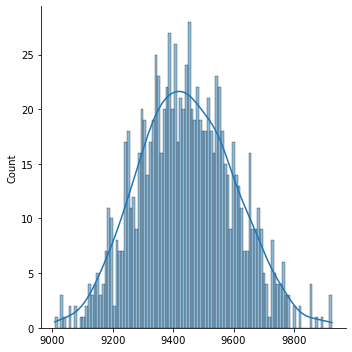

In [162]:
male_expense_mean = [walmart_df[walmart_df['Gender'] == 'M']['Purchase'].sample(1000).mean() for i in range(1000)]
sns.displot(male_expense_mean, bins = 100, kde = True)
plt.show()

In [169]:
pd.Series(male_expense_mean).mean(),pd.Series(male_expense_mean).std() 
# Std deviation is changed from 5092 to 158 for a sample of 1000

(9443.926705999991, 158.58776916981276)

In [ ]:
# Calculating confidence interval for 90, 95, 99 % Confidence

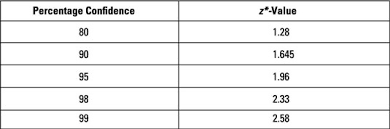

In [ ]:
# For 90% for All men

In [172]:
lower_limit_males = pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()*1.28)
upper_limit_males = pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()*1.28)
lower_limit_males_90 = round(lower_limit_males,2)
upper_limit_males_90 = round(upper_limit_males,2)
lower_limit_males_90,upper_limit_males_90

(9240.93, 9646.92)

**The mean of the purchase done by All Men will lie in the range (9064.74, 9815.74) with 91% confidence**

In [173]:
# For 95% for All men:
lower_limit_males_95 = round(pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()*1.96),2)
upper_limit_males_95 = round(pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()*1.96),2)
lower_limit_males_95,upper_limit_males_95

(9133.09, 9754.76)

**The mean of the purchase done by All Men will lie in the range (8865.25, 10015.22) with 95% confidence**

In [174]:
# For 99% for All men:
lower_limit_males_99 = round(pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()*2.58),2)
upper_limit_males_99 = round(pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()*2.58),2)
lower_limit_males_99, upper_limit_males_99

(9034.77, 9853.08)

**The mean of the purchase done by All Men will lie in the range (8683.37, 10197.11) with 99% confidence**

In [175]:
Confidence_Dict_Male = {"90%" : 1.28, "95%" : 1.96, "99%" : 2.58}
for key,value in Confidence_Dict_Male.items():
    lower_limit_males = round(pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()*value),2)
    upper_limit_males = round(pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All Men will lie in the range {lower_limit_males, upper_limit_males} with {key} confidence")

The mean of the purchase done by All Men will lie in the range (9240.93, 9646.92) with 90% confidence
The mean of the purchase done by All Men will lie in the range (9133.09, 9754.76) with 95% confidence
The mean of the purchase done by All Men will lie in the range (9034.77, 9853.08) with 99% confidence


In [146]:
# CLT on Females

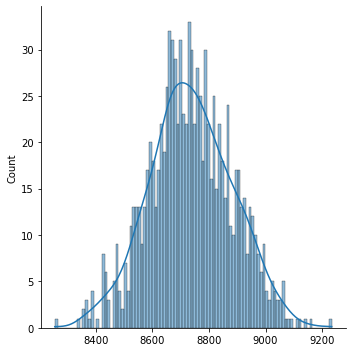

In [176]:
female_expense_mean = [walmart_df[walmart_df['Gender'] == 'F']['Purchase'].sample(1000).mean() for i in range(1000)]
len(female_expense_mean)
sns.displot(female_expense_mean, bins = 100, kde = True)
plt.show()

In [177]:
pd.Series(female_expense_mean).mean(),pd.Series(female_expense_mean).std()
 # Std deviation is changed from 4767 to 146 

(8736.780020999986, 146.75811859903118)

In [178]:
Confidence_Dict_female = {"90%" : 1.28, "95%" : 1.96, "99%" : 2.58}
for key,value in Confidence_Dict_female.items():
    lower_limit_females = round(pd.Series(female_expense_mean).mean() - (pd.Series(female_expense_mean).std()*value),2)
    upper_limit_females = round(pd.Series(female_expense_mean).mean() + (pd.Series(female_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All Females will lie in the range {lower_limit_females, upper_limit_females} with {key} confidence")
    

The mean of the purchase done by All Females will lie in the range (8548.93, 8924.63) with 90% confidence
The mean of the purchase done by All Females will lie in the range (8449.13, 9024.43) with 95% confidence
The mean of the purchase done by All Females will lie in the range (8358.14, 9115.42) with 99% confidence


In [179]:
# Overlap in confidence interval

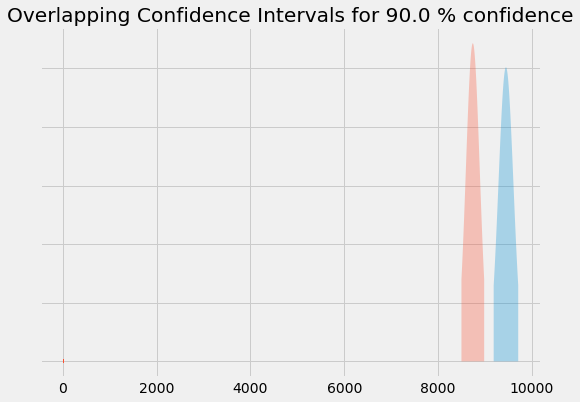

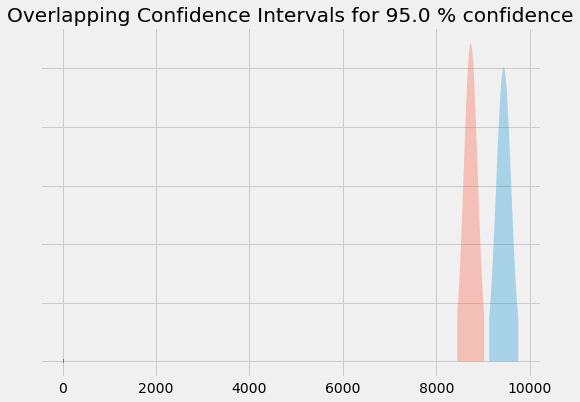

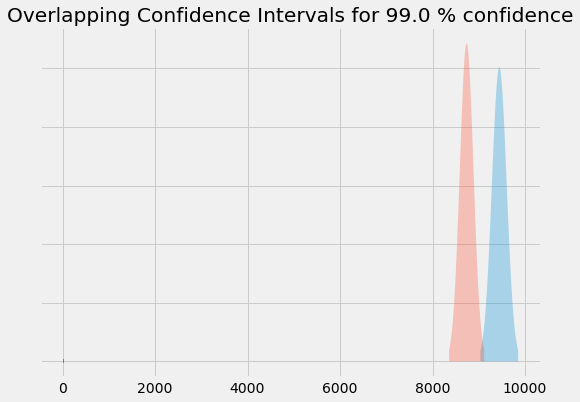

In [184]:
import matplotlib.style as style
style.use('fivethirtyeight')

mu_male = 9443
mu_female = 8737
sd_male = 159
sd_female = 147

for i in [0.9, 0.95, 0.99]:
    
    ci1 = stats.norm.interval(i, loc=mu_male, scale=sd_male)
    ci2 = stats.norm.interval(i, loc=mu_female, scale=sd_female)

    def returnNormalY(x, mu, sd):
        return 1/(sd * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sd**2))

    # Generate Data for Plot
    # Fill Section
    x1 = np.linspace(ci1[0], ci1[1], 1000)
    y1 = returnNormalY(x1, mu_male, sd_male)
    x2 = np.linspace(ci2[0], ci2[1], 1000)
    y2 = returnNormalY(x2, mu_female, sd_female)
    # Line Section
    x1_line = np.linspace(0, 17)
    y1_line = returnNormalY(x1_line, mu_male, sd_male)
    x2_line = np.linspace(9, 25)
    y2_line = returnNormalY(x2_line, mu_female, sd_female)

    # Generate Plot
    fig, ax = plt.subplots()
    ax.plot(x1_line, y1_line)
    ax.plot(x2_line, y2_line)
    ax.fill_between(x1, y1, alpha=0.3)
    ax.fill_between(x2, y2, alpha=0.3)

    # Plot Editing
    fig.set_size_inches(8, 6, forward=False)
    ax.set_yticklabels([])
    plt.title(f"Overlapping Confidence Intervals for {i *100} % confidence")
    plt.show()

**For sample size is 600 for males and 300 for females**

In [194]:
male_expense_mean = [walmart_df[walmart_df['Gender'] == 'M']['Purchase'].sample(600).mean() for i in range(1000)]
round(pd.Series(male_expense_mean).mean(),2),round(pd.Series(male_expense_mean).std(),2)

(9433.67, 210.66)

In [195]:
female_expense_mean = [walmart_df[walmart_df['Gender'] == 'F']['Purchase'].sample(300).mean() for i in range(1000)]
round(pd.Series(female_expense_mean).mean(),2),round(pd.Series(female_expense_mean).std(),2)

(8749.14, 278.4)

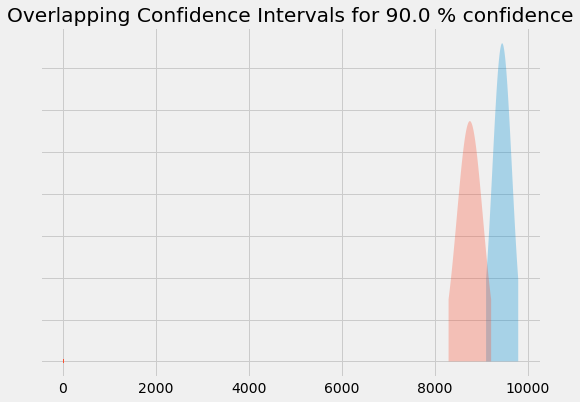

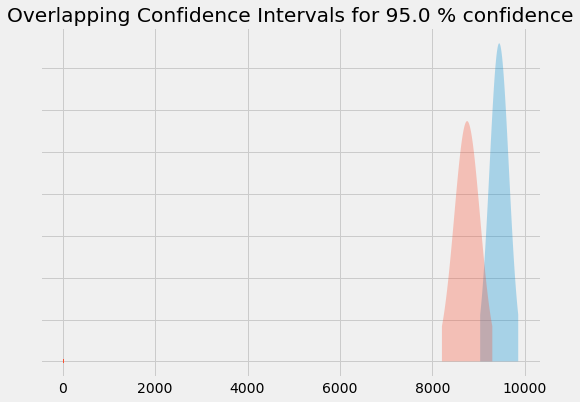

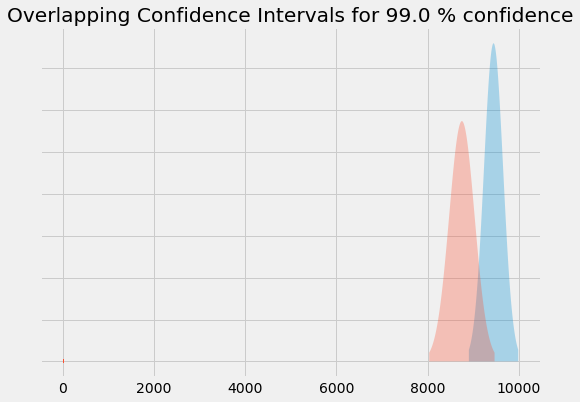

In [196]:
import matplotlib.style as style
style.use('fivethirtyeight')

mu_male = 9443
mu_female = 8749
sd_male = 210
sd_female = 278

for i in [0.9, 0.95, 0.99]:
    
    ci1 = stats.norm.interval(i, loc=mu_male, scale=sd_male)
    ci2 = stats.norm.interval(i, loc=mu_female, scale=sd_female)

    def returnNormalY(x, mu, sd):
        return 1/(sd * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sd**2))

    # Generate Data for Plot
    # Fill Section
    x1 = np.linspace(ci1[0], ci1[1], 1000)
    y1 = returnNormalY(x1, mu_male, sd_male)
    x2 = np.linspace(ci2[0], ci2[1], 1000)
    y2 = returnNormalY(x2, mu_female, sd_female)
    # Line Section
    x1_line = np.linspace(0, 17)
    y1_line = returnNormalY(x1_line, mu_male, sd_male)
    x2_line = np.linspace(9, 25)
    y2_line = returnNormalY(x2_line, mu_female, sd_female)

    # Generate Plot
    fig, ax = plt.subplots()
    ax.plot(x1_line, y1_line)
    ax.plot(x2_line, y2_line)
    ax.fill_between(x1, y1, alpha=0.3)
    ax.fill_between(x2, y2, alpha=0.3)

    # Plot Editing
    fig.set_size_inches(8, 6, forward=False)
    ax.set_yticklabels([])
    plt.title(f"Overlapping Confidence Intervals for {i *100} % confidence")
    plt.show()

**Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?**
- The mean of the purchase done by All Men will lie in the range (9240.93, 9646.92) with 90% confidence
- The mean of the purchase done by All Men will lie in the range (9133.09, 9754.76) with 95% confidence
- The mean of the purchase done by All Men will lie in the range (9034.77, 9853.08) with 99% confidence
- The mean of the purchase done by All Females will lie in the range (8548.93, 8924.63) with 90% confidence
- The mean of the purchase done by All Females will lie in the range (8449.13, 9024.43) with 95% confidence
- The mean of the purchase done by All Females will lie in the range (8358.14, 9115.42) with 99% confidence

**As the confidence percentage inreases, the spread i.e the difference between the upper limit and lower limit also increases.
Also, we can conclude that, mean purchase done by men is higher than females as we hardly see any overlap, the Walmart management should focus more on individual category and should cater to specific needs for boths categories differently.**


# CLT for Married 

In [199]:
walmart_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [210]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 24.3+ MB


In [207]:
walmart_df['Marital_Status'] = walmart_df['Marital_Status'].astype('category')

In [218]:
# 0 - Unmarried
# 1 - Married

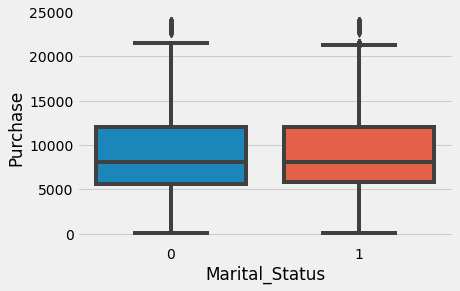

In [216]:
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = walmart_df)
plt.show()


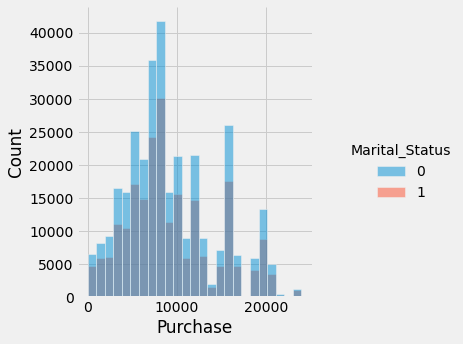

In [217]:
sns.displot(data = walmart_df, x = 'Purchase', hue = 'Marital_Status',bins = 25)
plt.show()

In [213]:
walmart_df[walmart_df['Marital_Status'] == 0]['Purchase']

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550056      254
550059       48
550062      473
550064      371
550066      365
Name: Purchase, Length: 324731, dtype: int64

In [219]:
walmart_df[walmart_df['Marital_Status'] == 1]['Purchase']

6         19215
7         15854
8         15686
9          7871
10         5254
          ...  
550060      494
550061      599
550063      368
550065      137
550067      490
Name: Purchase, Length: 225337, dtype: int64

In [228]:
walmart_df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


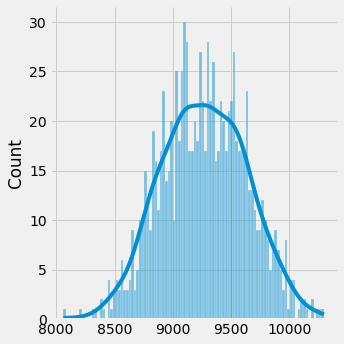

In [224]:
unmarried_expense_mean = [walmart_df[walmart_df['Marital_Status'] == 0]['Purchase'].sample(200).mean() for i in range(1000)]
sns.displot(unmarried_expense_mean, bins = 100, kde = True)
plt.show()


In [226]:
pd.Series(unmarried_expense_mean).mean(),pd.Series(unmarried_expense_mean).std() 

(9268.77801, 365.15712291567814)

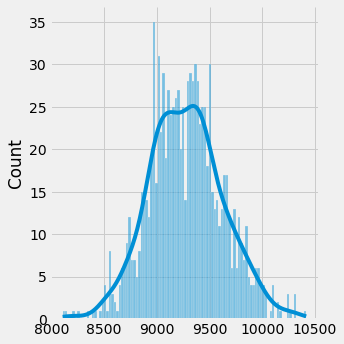

In [225]:
married_expense_mean = [walmart_df[walmart_df['Marital_Status'] == 1]['Purchase'].sample(200).mean() for i in range(1000)]
sns.displot(married_expense_mean, bins = 100, kde = True)
plt.show()

In [227]:
pd.Series(married_expense_mean).mean(),pd.Series(married_expense_mean).std() 

(9276.342960000013, 352.3281763501019)

In [231]:
Confidence_Dict = {"90%" : 1.28, "95%" : 1.96, "99%" : 2.58}
for key,value in Confidence_Dict.items():
    lower_limit_unmarried = round(pd.Series(unmarried_expense_mean).mean() - (pd.Series(unmarried_expense_mean).std() *value),2)
    upper_limit_unmarried = round(pd.Series(unmarried_expense_mean).mean() + (pd.Series(unmarried_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All unmarried singles will lie in the range {lower_limit_unmarried, upper_limit_unmarried} with {key}")
    
for key,value in Confidence_Dict.items():
    lower_limit_married = round(pd.Series(married_expense_mean).mean() - (pd.Series(married_expense_mean).std() *value),2)
    upper_limit_married = round(pd.Series(married_expense_mean).mean() + (pd.Series(married_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All married couples will lie in the range {lower_limit_married, upper_limit_married} with {key}")

The mean of the purchase done by All unmarried singles will lie in the range (8801.38, 9736.18) with 90%
The mean of the purchase done by All unmarried singles will lie in the range (8553.07, 9984.49) with 95%
The mean of the purchase done by All unmarried singles will lie in the range (8326.67, 10210.88) with 99%
The mean of the purchase done by All married couples will lie in the range (8825.36, 9727.32) with 90%
The mean of the purchase done by All married couples will lie in the range (8585.78, 9966.91) with 95%
The mean of the purchase done by All married couples will lie in the range (8367.34, 10185.35) with 99%


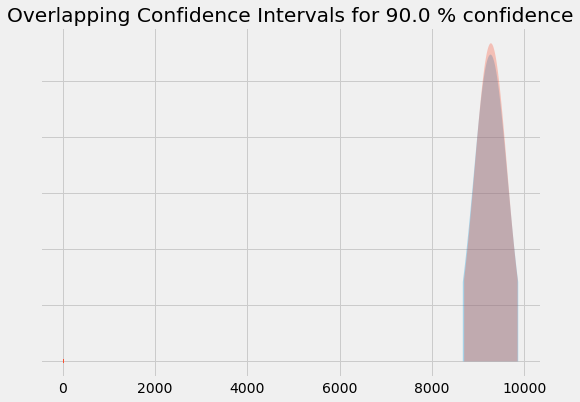

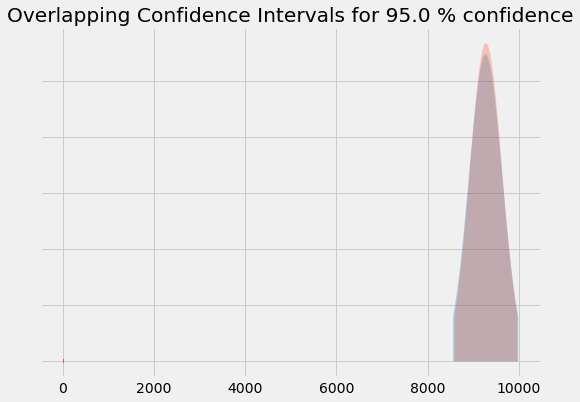

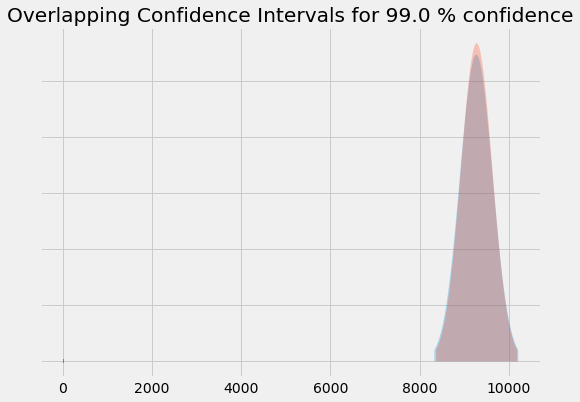

In [232]:
import matplotlib.style as style
style.use('fivethirtyeight')

mu_unmarr = 9268
mu_marr = 9276
sd_unmarr = 365
sd_marr = 352

for i in [0.9, 0.95, 0.99]:
    
    ci1 = stats.norm.interval(i, loc=mu_unmarr, scale=sd_unmarr)
    ci2 = stats.norm.interval(i, loc=mu_marr, scale=sd_marr)

    def returnNormalY(x, mu, sd):
        return 1/(sd * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sd**2))

    # Generate Data for Plot
    # Fill Section
    x1 = np.linspace(ci1[0], ci1[1], 1000)
    y1 = returnNormalY(x1, mu_unmarr, sd_unmarr)
    x2 = np.linspace(ci2[0], ci2[1], 1000)
    y2 = returnNormalY(x2, mu_marr, sd_marr)
    # Line Section
    x1_line = np.linspace(0, 17)
    y1_line = returnNormalY(x1_line, mu_unmarr, sd_unmarr)
    x2_line = np.linspace(9, 25)
    y2_line = returnNormalY(x2_line, mu_marr, sd_marr)

    # Generate Plot
    fig, ax = plt.subplots()
    ax.plot(x1_line, y1_line)
    ax.plot(x2_line, y2_line)
    ax.fill_between(x1, y1, alpha=0.3)
    ax.fill_between(x2, y2, alpha=0.3)

    # Plot Editing
    fig.set_size_inches(8, 6, forward=False)
    ax.set_yticklabels([])
    plt.title(f"Overlapping Confidence Intervals for {i *100} % confidence")
    plt.show()

Conclusion: 
- The mean of the purchase done by All unmarried singles will lie in the range (8801.38, 9736.18) with 90%
- The mean of the purchase done by All unmarried singles will lie in the range (8553.07, 9984.49) with 95%
- The mean of the purchase done by All unmarried singles will lie in the range (8326.67, 10210.88) with 99%
- The mean of the purchase done by All married couples will lie in the range (8825.36, 9727.32) with 90%
- The mean of the purchase done by All married couples will lie in the range (8585.78, 9966.91) with 95%
- The mean of the purchase done by All married couples will lie in the range (8367.34, 10185.35) with 99%

# CLT for Age

In [240]:
walmart_df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

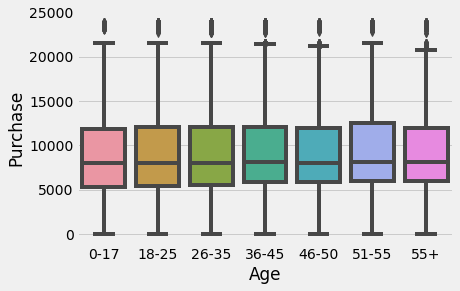

In [234]:
sns.boxplot(x = 'Age', y = 'Purchase', data = walmart_df)
plt.show()

In [239]:
walmart_df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [242]:
age_list=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

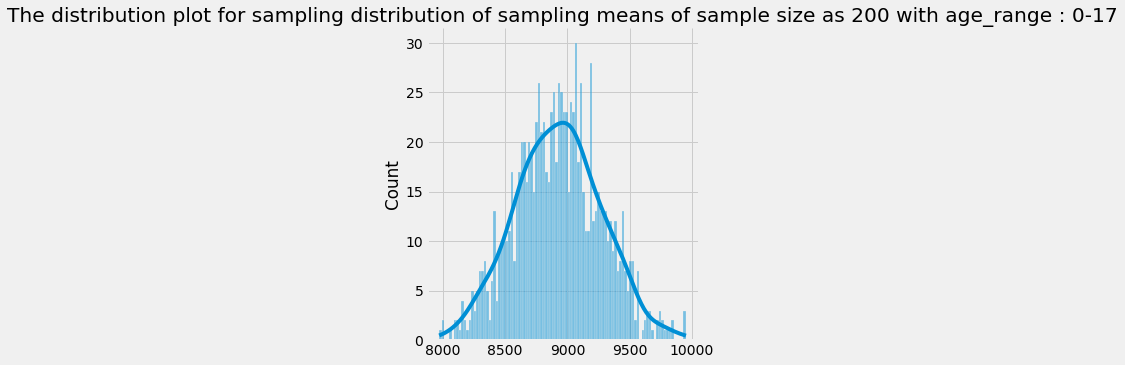

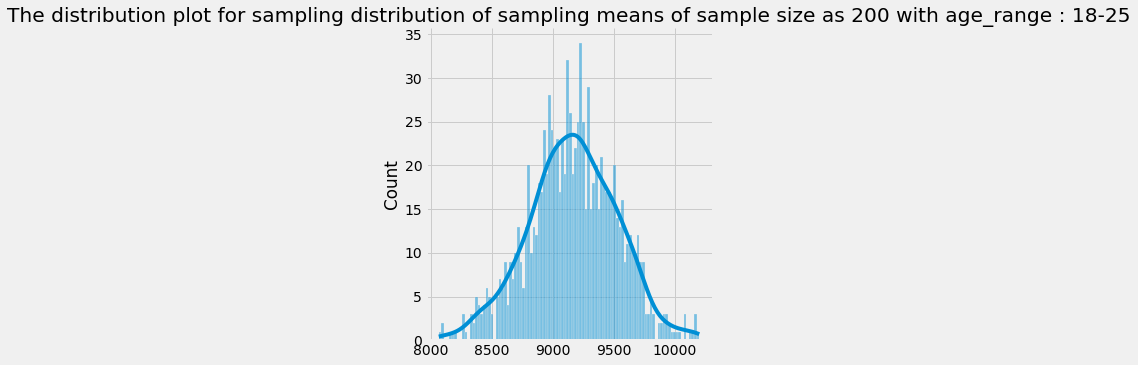

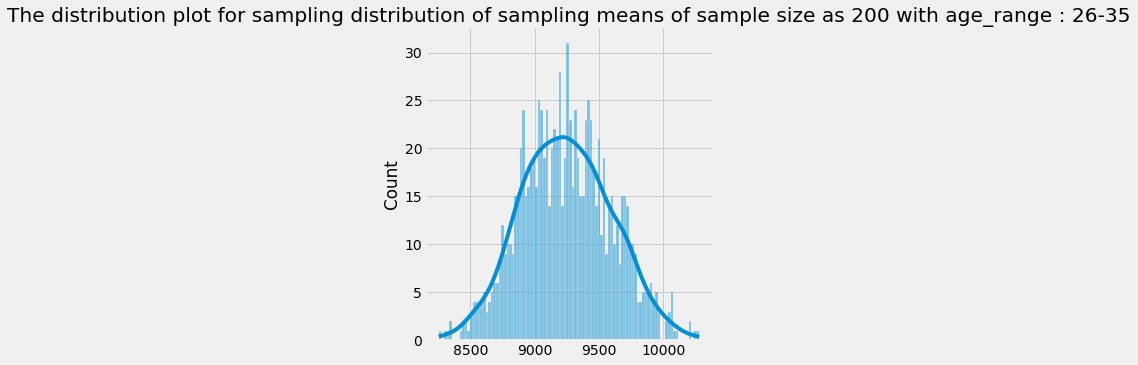

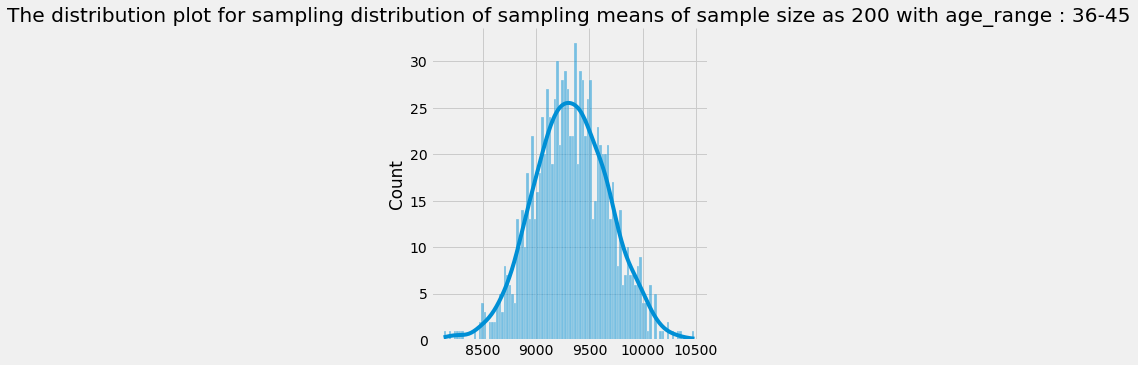

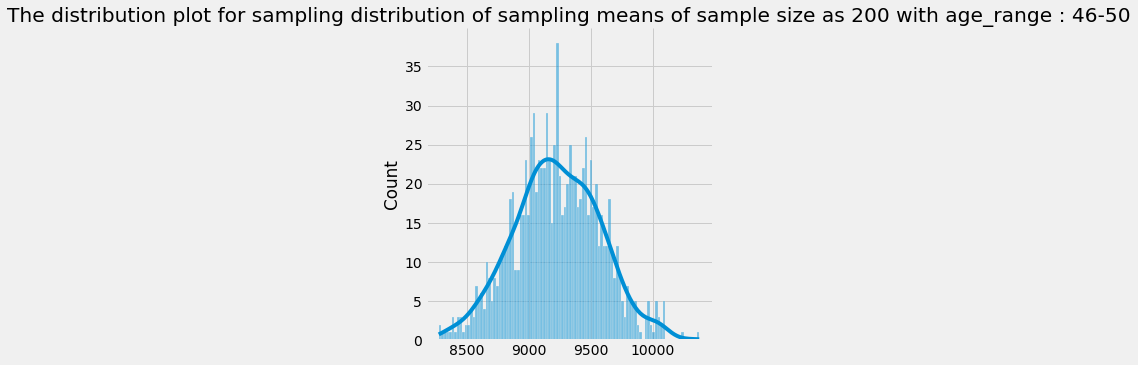

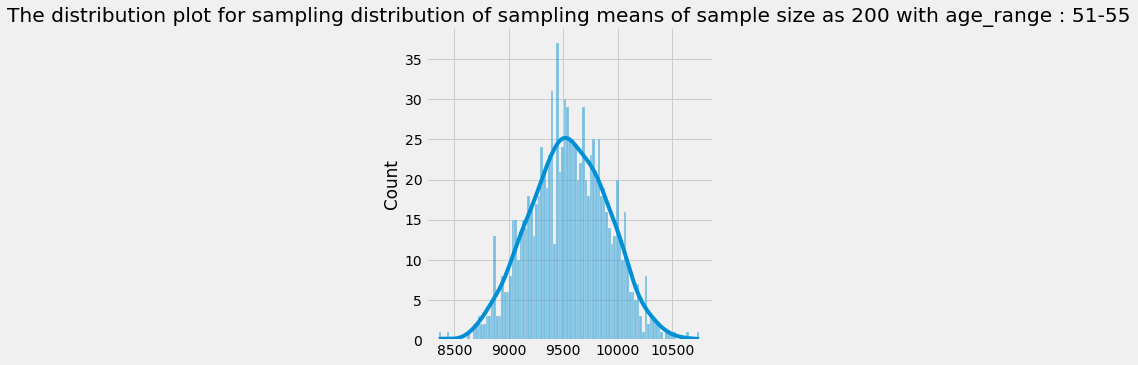

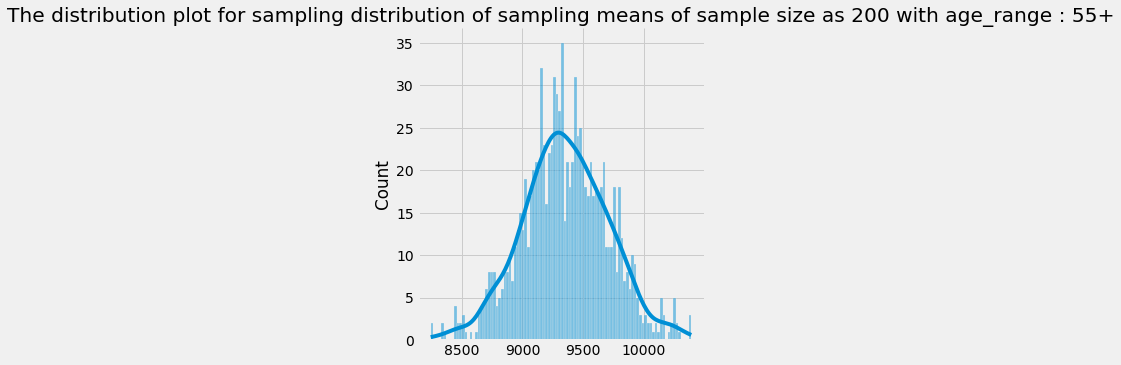

In [244]:
for i in age_list:
    age_Range_Expense_Mean = [walmart_df[walmart_df['Age'] == i]['Purchase'].sample(200).mean() for j in range(1000)]
    sns.displot(age_Range_Expense_Mean, bins = 100, kde = True)
    plt.title(f"The distribution plot for sampling distribution of sampling means of sample size as 200 with age_range : {i}")
    plt.show()